In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')
from sklearn import preprocessing
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import cross_validate
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from matplotlib import rcParams

In [2]:
plt.rc('font', family='Trebuchet MS', size=36)
plt.rc('axes', linewidth=2)
plt.rc('lines', markersize=15)
plt.rc('xtick.major', size=16, width = 3)
plt.rc('ytick.major', size=16, width = 3)
plt.rc('ytick.minor', size=16)
plt.rc('xtick', labelsize=32)
plt.rc('ytick', labelsize=32)

In [3]:
unProcessed = pd.read_csv("Freeze Vectors Divided.csv", index_col=0, low_memory=False)
unProcessed.convert_dtypes()

scale = preprocessing.RobustScaler()
dat = pd.DataFrame(scale.fit_transform(unProcessed), index=unProcessed.index, columns=unProcessed.columns)


In [4]:
dat.head()

Si umol/m^2  Al/Si s/b  Fe/Si s/b  Mg/Si s/b  Ca/Si s/b  \
AST_A_10min    -0.053059   2.682076   2.199717   0.803027   1.862123   
AST_A_120hr    -0.054771   3.084502   1.897744   0.513241   1.332531   
AST_A_1hr       0.003423   3.110240   1.784189   0.428372   0.983944   
AST_A_24hr      0.126658   3.015029   1.419411   0.230875   0.518724   
AST_A_4hr       0.183141   2.466868   1.055938  -0.122206   0.037797   

             Na/Si s/b  K/Si s/b         0         1         2         3  \
AST_A_10min   0.503870  1.619244 -0.146078 -0.165181 -0.183569 -0.202997   
AST_A_120hr   0.483612  1.185455  0.002463  0.005141  0.011443  0.017425   
AST_A_1hr     0.350353  0.955380  0.011782  0.018574  0.030898  0.044833   
AST_A_24hr    0.086836  0.681605  1.925954  1.837405  1.710577  1.578941   
AST_A_4hr    -0.294030  0.310547 -0.076926 -0.096987 -0.119798 -0.147158   

                    4         5         6         7         8         9  \
AST_A_10min -0.225524 -0.223333 -0.277003 -0.348180 -0.369172 -0.366859   
AST_A_120hr  0.021756  0.024785 -0.026867 -0.038483 -0.045739 -0.050197   
AST_A_1hr    0.059362  0.070052  0.026867  0.038483  0.045739  0.050197   
AST_A_24hr   1.460676  1.224780  0.990617  1.033223  0.916700  0.768214   
AST_A_4hr   -0.180390 -0.194411 -0.262808 -0.346983 -0.382641 -0.392068   

                   10  
AST_A_10min -0.347859  
AST_A_120hr -0.051863  
AST_A_1hr    0.051863  
AST_A_24hr   0.618722  
AST_A_4hr   -0.380436

C:\Users\willi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


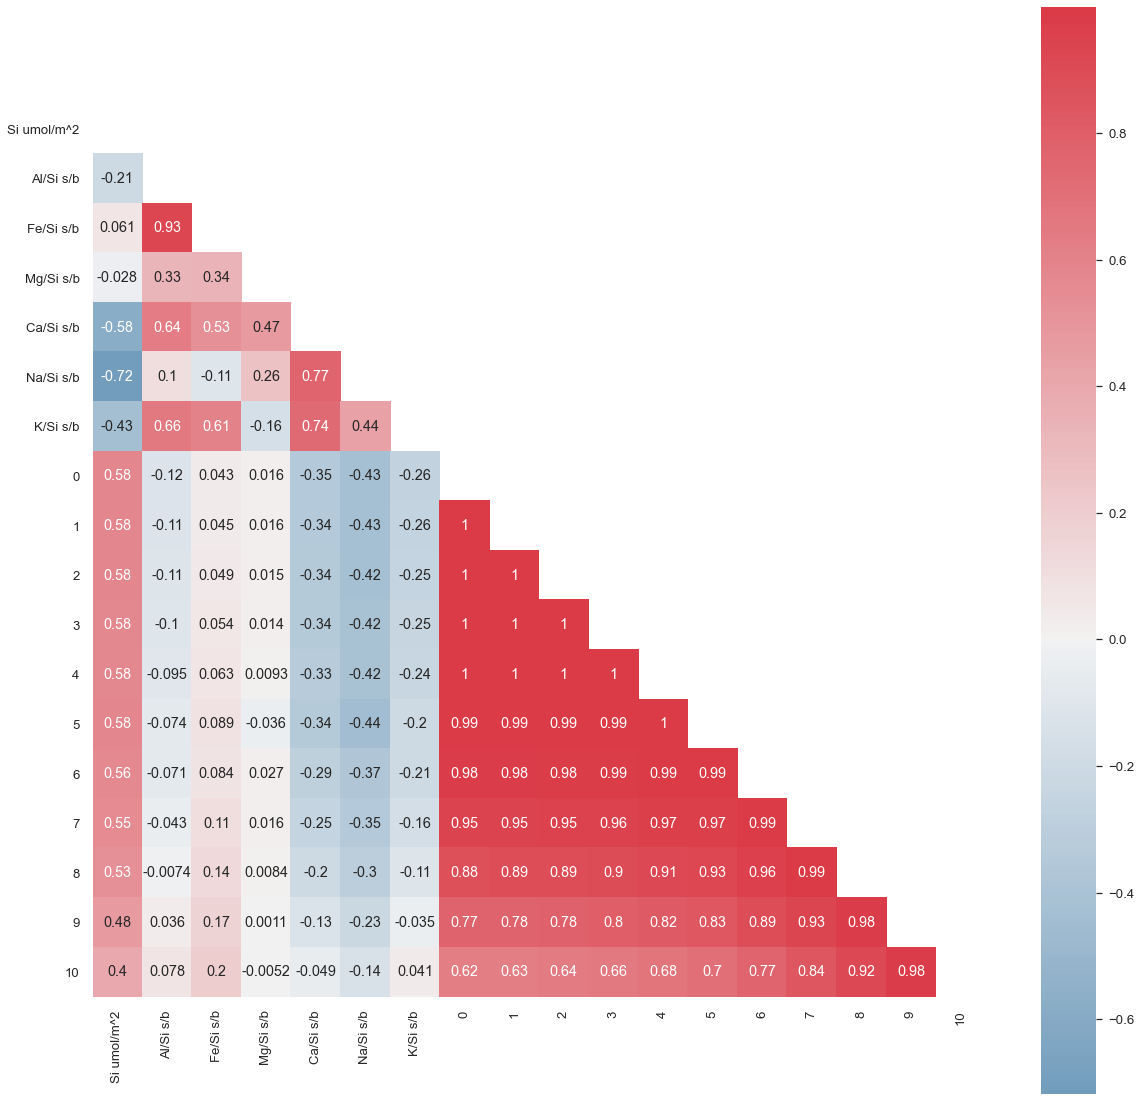

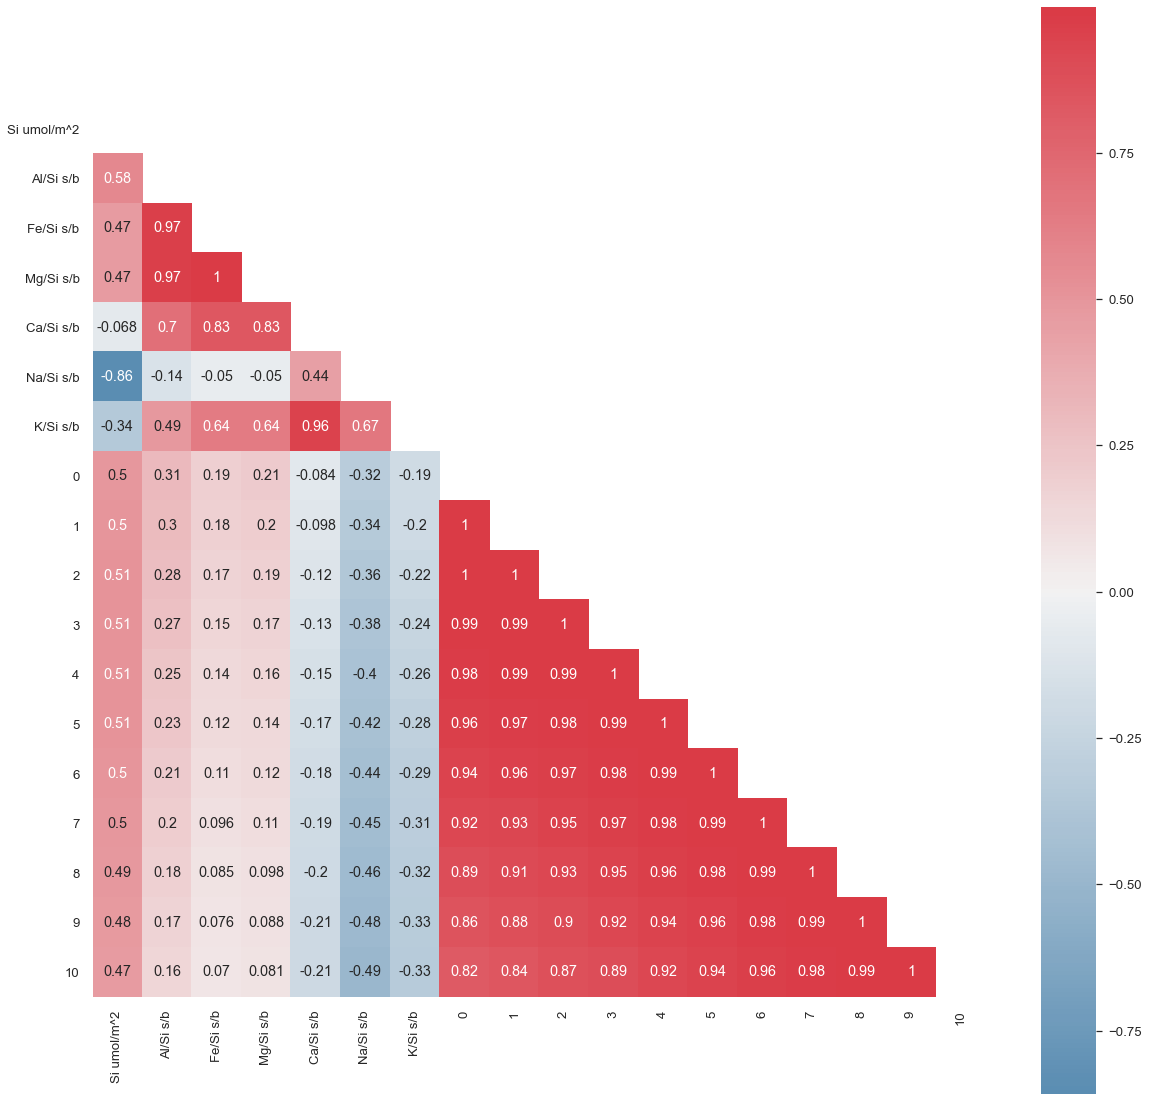

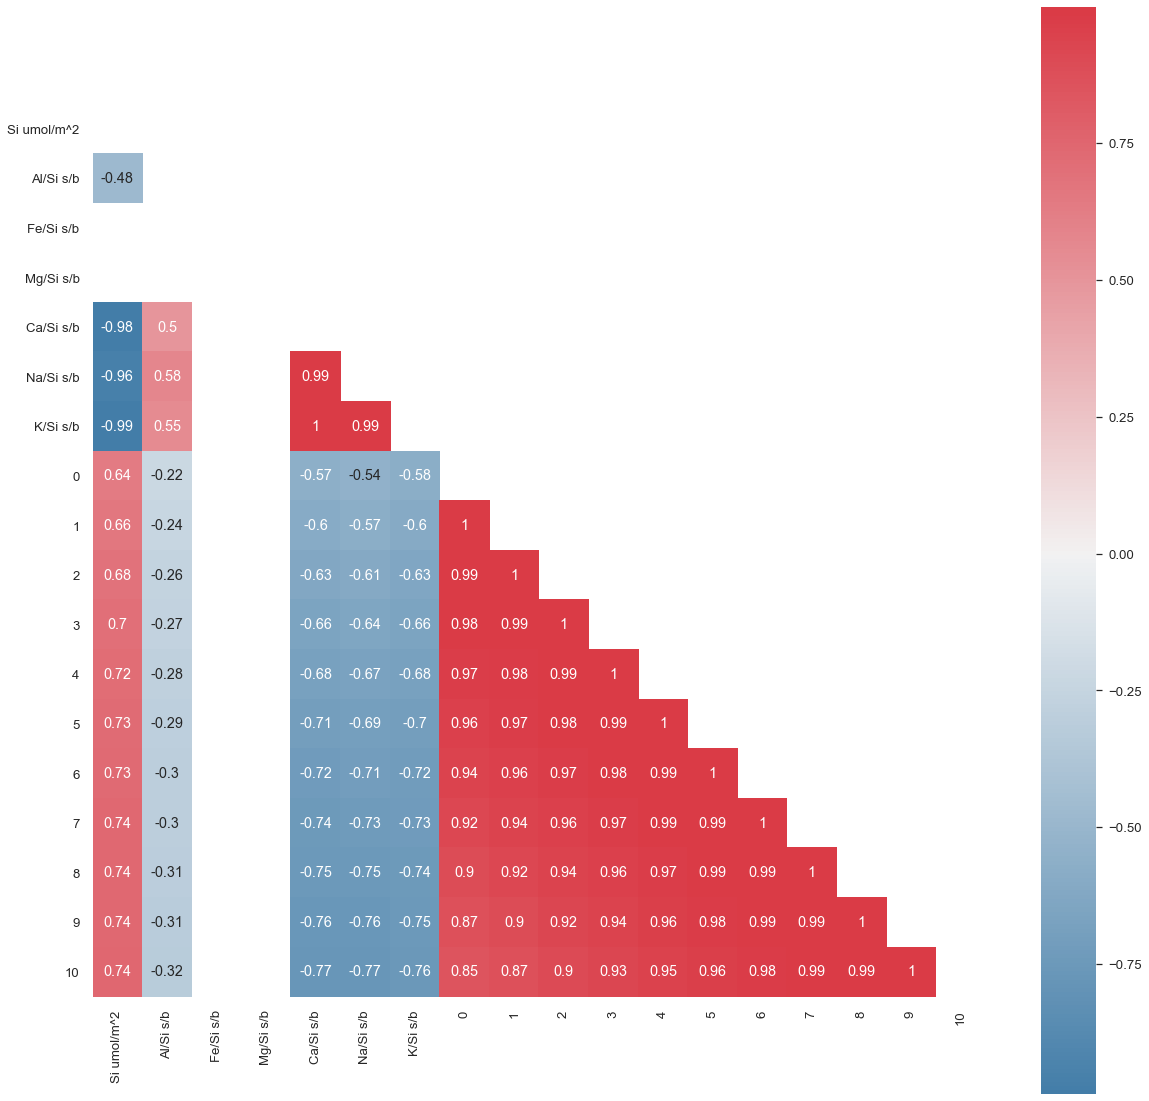

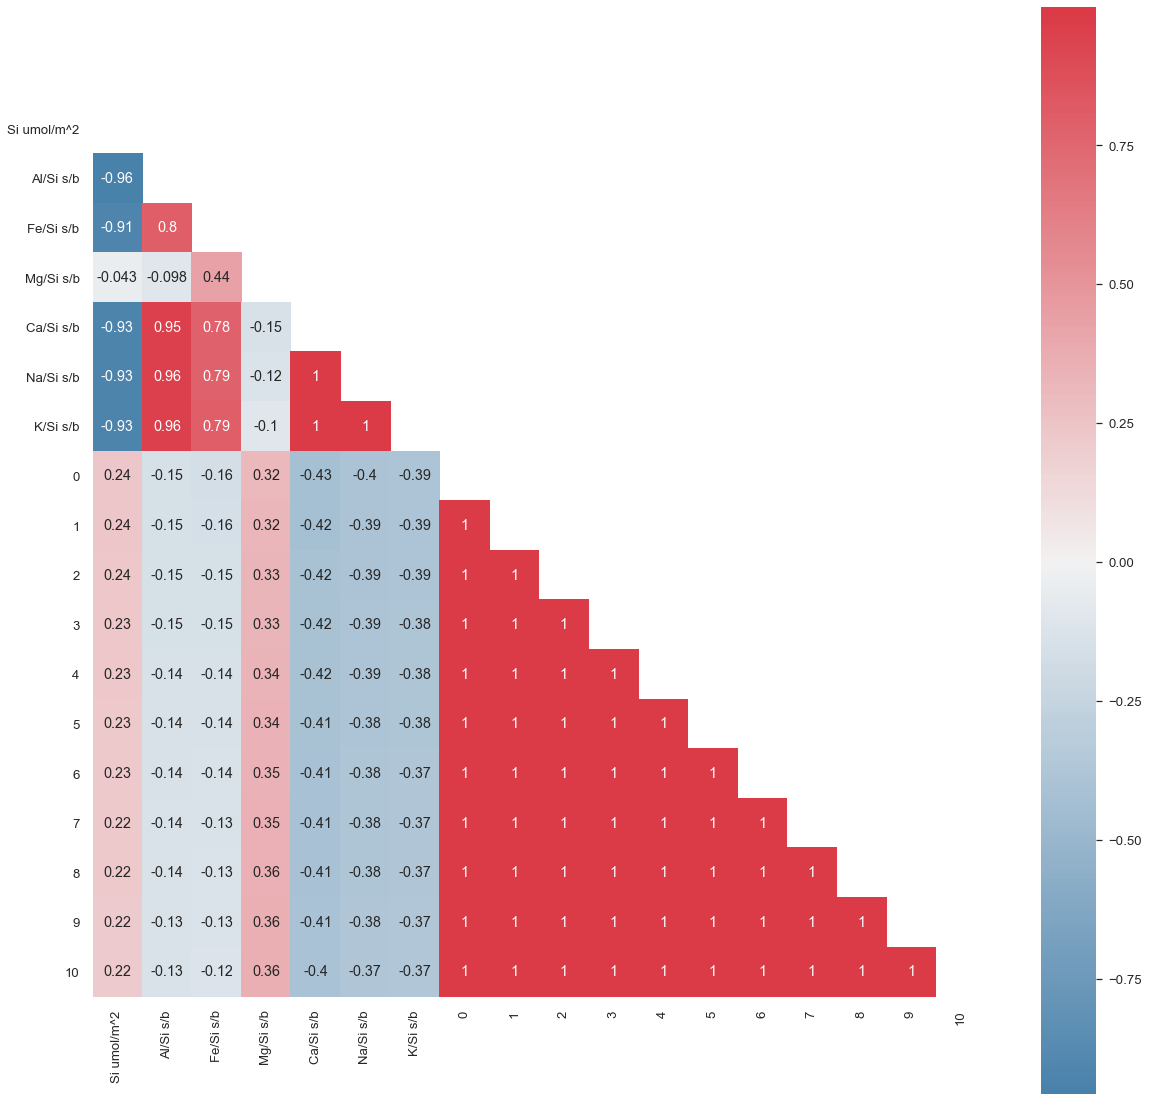

In [5]:
corr = dat.corr()
sns.set(style="white", font_scale=1.2)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
dat = dat

datfue = dat.iloc[10:, :]
datast = dat.iloc[:10, :]
datfuew = dat.iloc[15:20, :]
datfuea = dat.iloc[10:15, :]
datastw = dat.iloc[5:10, :]
datasta = dat.iloc[:5, :]


corrFig, corrAx = plt.subplots(figsize=(20, 20))
corrHeatmap = sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, annot=True).get_figure()
corrHeatmap.savefig("corrHeatmap.png")

corr = datfue.corr()
corrFig, corrAx = plt.subplots(figsize=(20, 20))
corrHeatmap = sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, annot=True).get_figure()
corrHeatmap.savefig("corrHeatmapFUE.png")

corr=datast.corr()
corrFig, corrAx = plt.subplots(figsize=(20, 20))
corrHeatmap = sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, annot=True).get_figure()
corrHeatmap.savefig("corrHeatmapAST.png")

corr = datfuew.corr()
corrFig, corrAx = plt.subplots(figsize=(20, 20))
corrHeatmap = sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, annot=True).get_figure()
corrHeatmap.savefig("corrHeatmapFUEW.png")

corr=datastw.corr()
corrFig, corrAx = plt.subplots(figsize=(20, 20))
corrHeatmap = sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, annot=True).get_figure()
corrHeatmap.savefig("corrHeatmapASTW.png")


corr = datfuea.corr()
corrFig, corrAx = plt.subplots(figsize=(20, 20))
corrHeatmap = sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, annot=True).get_figure()
corrHeatmap.savefig("corrHeatmapFUEA.png")

corr=datasta.corr()
corrFig, corrAx = plt.subplots(figsize=(20, 20))
corrHeatmap = sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, annot=True).get_figure()
corrHeatmap.savefig("corrHeatmapASTA.png")

In [6]:
pred = dat.iloc[:, :7]
pred = pred[pred.columns[::-1]]

desc = dat.iloc[:, 7:]
lpo = LeavePOut(p=1)

svm = MultiOutputRegressor(SVR(C=7), n_jobs=-1)
svms = []
svmTest = [0 for i in range(20)]

for train_idx, test_idx in lpo.split(desc):
    svm.fit(pred.values[train_idx], desc.values[train_idx])
    svmTest[test_idx[0]] = svm.predict(pred.values[test_idx])[0]
    svms.append(svm)

svm = MultiOutputRegressor(SVR(C=7), n_jobs=-1)

svm.fit(pred.values, desc.values)

svmTrain = mean_absolute_error(svm.predict(pred.values), desc.values)

means = desc.mean(axis=0)

badmodel = pd.DataFrame([means for i in range(desc.shape[0])])

print('expected value scores: ')
print(mean_absolute_error(badmodel, desc))
print('SVM training scores: ')
print(svmTrain)
print('SVM test scores: ')
print(mean_absolute_error(svmTest, desc.values))

expected value scores: 
2.7644316596106964
SVM training scores: 
1.3436137484421162
SVM test scores: 
1.689610340945377


Features sorted by score for SVM estimator
Si umol/m^2    0.388317
Al/Si s/b      0.030866
Na/Si s/b      0.017173
Mg/Si s/b      0.014537
Ca/Si s/b      0.011039
K/Si s/b       0.005982
Fe/Si s/b      0.005317
dtype: float64


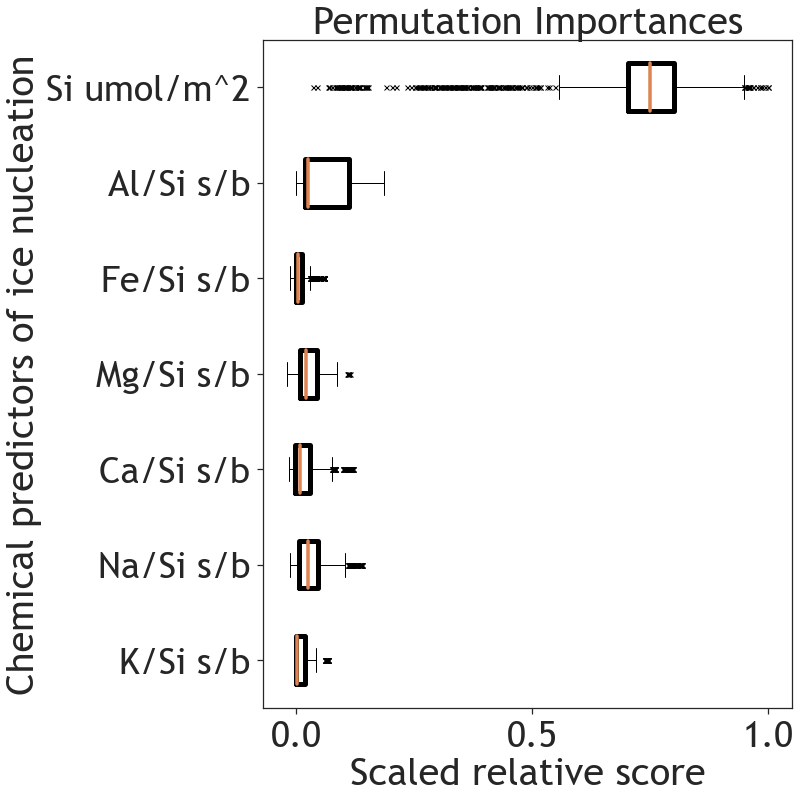

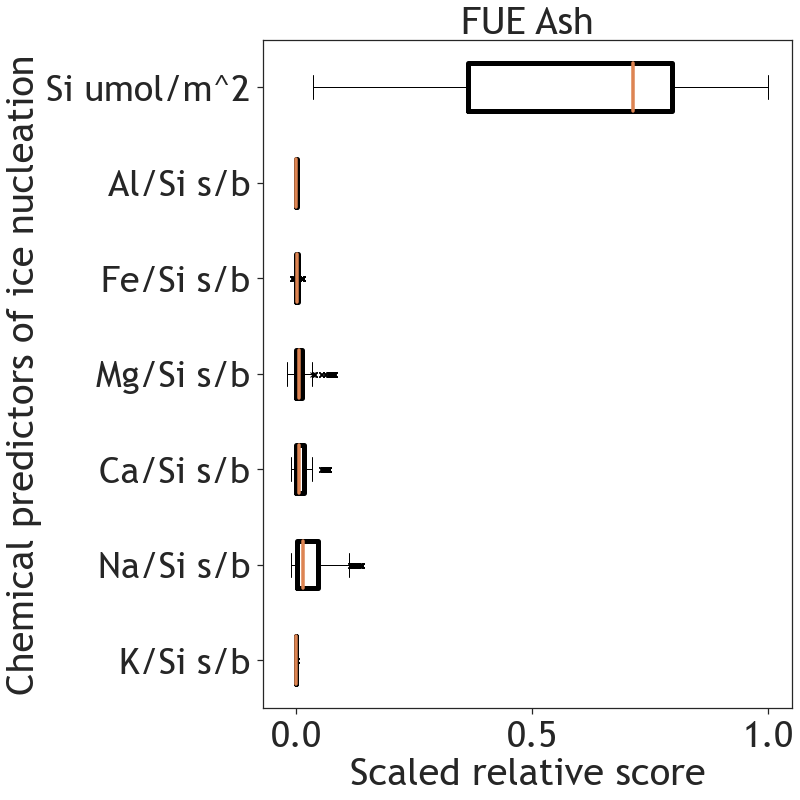

FUE importances:
Si umol/m^2    0.356680
Na/Si s/b      0.017503
Ca/Si s/b      0.006640
Mg/Si s/b      0.006072
Fe/Si s/b      0.000767
K/Si s/b      -0.000093
Al/Si s/b     -0.000268
dtype: float64
AST importances:
Al/Si s/b      1.242886
Mg/Si s/b      0.245557
Na/Si s/b      0.100690
Ca/Si s/b      0.067307
Fe/Si s/b      0.022991
K/Si s/b       0.011495
Si umol/m^2   -0.024718
dtype: float64


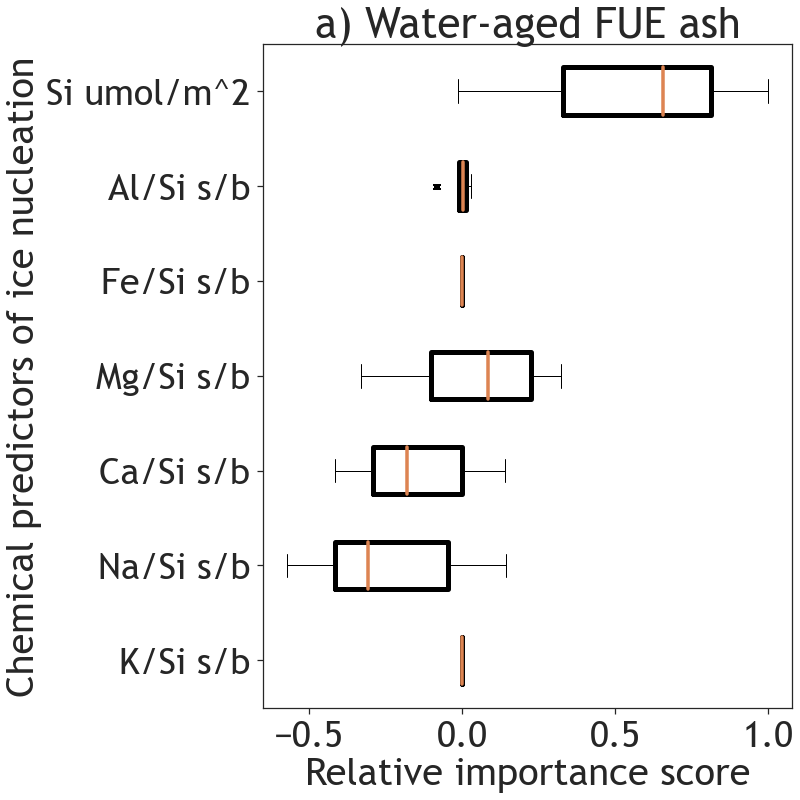

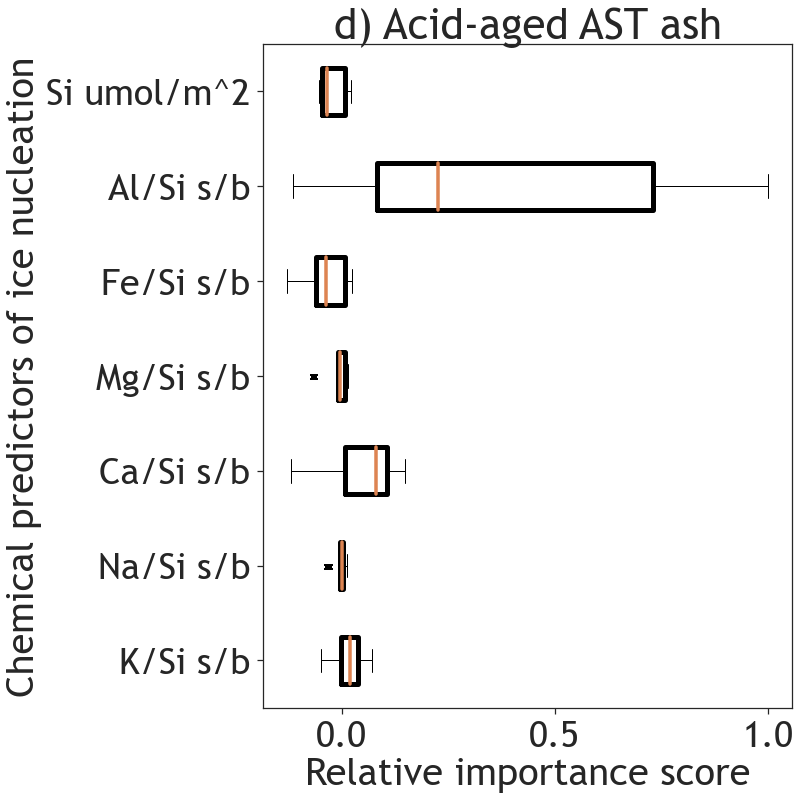

In [8]:
rcParams.update({'figure.autolayout': True})
boximp = pd.DataFrame()
svmimpmean = pd.DataFrame()
svmimpstd = pd.DataFrame()

boxprops = dict(linewidth=5)
medianprops = dict(linewidth = 3.5)
flierprops = dict(marker = 'x', markersize = 5)
plt.rc('font', family='Trebuchet MS', size=36)
plt.rc('xtick', labelsize=36)
plt.rc('ytick', labelsize=36)

for idx, estimator in enumerate(svms):
    imp = permutation_importance(estimator, pred, desc, n_jobs=-1, n_repeats=50)
    boximp=pd.concat([boximp, pd.DataFrame(imp.importances, index=pred.columns, columns=np.arange((idx+1)*50-50, (idx+1)*50))], axis=1)
    svmimpmean=svmimpmean.append(pd.Series(imp.importances_mean, index=pred.columns, name='SVM%d'%idx))
    svmimpstd=svmimpstd.append(pd.Series(imp.importances_mean, index=pred.columns, name='SVM%d'%idx))

aveimpsvm = svmimpmean.mean(axis=0).sort_values(ascending=False)
print('Features sorted by score for SVM estimator')
print(aveimpsvm)


fig, ax = plt.subplots(figsize=(12, 12))
ax.boxplot(boximp.T.values/boximp.max(axis=0).max(axis=0), vert=False, labels=pred.columns,  boxprops=boxprops, medianprops=medianprops, flierprops=flierprops)
ax.set_title('Permutation Importances', fontsize=38)
ax.set_ylabel('Chemical predictors of ice nucleation', fontsize=38)
ax.set_xlabel('Scaled relative score', fontsize=38)
ax.tick_params(bottom = True, left = True,  top=False, right=False)
fig.savefig('PI')
plt.show()


fueimp = pd.DataFrame()
fueimpmean = pd.DataFrame()
fueimpstd = pd.DataFrame()

for idx, estimator in enumerate(svms):
    imp = permutation_importance(estimator, pred.iloc[10:20, :], desc.iloc[10:20, :], n_jobs=-1, n_repeats=50)
    fueimp=pd.concat([fueimp, pd.DataFrame(imp.importances, index=pred.columns, columns=np.arange((idx+1)*50-50, (idx+1)*50))], axis=1)
    fueimpmean=fueimpmean.append(pd.Series(imp.importances_mean, index=pred.columns, name='SVM%d'%idx))
    fueimpstd=fueimpstd.append(pd.Series(imp.importances_mean, index=pred.columns, name='SVM%d'%idx))

fig, ax = plt.subplots(figsize=(12, 12))
ax.boxplot(fueimp.T.values/fueimp.max(axis=0).max(axis=0), vert=False, labels=pred.columns,  boxprops=boxprops, medianprops=medianprops, flierprops=flierprops)
ax.set_title('FUE Ash', fontsize=38)
ax.set_ylabel('Chemical predictors of ice nucleation', fontsize=38)
ax.set_xlabel('Scaled relative score', fontsize=38)
ax.tick_params(bottom = True, left = True, top=False, right=False)
fig.savefig('PIFUE')
plt.show()

astimp = pd.DataFrame()
astimpmean = pd.DataFrame()
astimpstd = pd.DataFrame()
for idx, estimator in enumerate(svms):
    imp = permutation_importance(estimator, pred.iloc[:10, :], desc.iloc[:10, :], n_jobs=-1, n_repeats=50)
    astimp=pd.concat([astimp, pd.DataFrame(imp.importances, index=pred.columns, columns=np.arange((idx+1)*50-50, (idx+1)*50))], axis=1)
    astimpmean=astimpmean.append(pd.Series(imp.importances_mean, index=pred.columns, name='SVM%d'%idx))
    astimpstd=astimpstd.append(pd.Series(imp.importances_mean, index=pred.columns, name='SVM%d'%idx))

    
fig1, ax1 = plt.subplots(figsize=(12, 12))
ax1.boxplot(astimp.T.values/astimp.max(axis=0).max(axis=0), vert=False, labels=pred.columns,  boxprops=boxprops, medianprops=medianprops, flierprops=flierprops)
ax1.set_title('AST Ash', fontsize=42)
ax1.set_ylabel('Chemical predictors of ice nucleation', fontsize=38)
ax1.set_xlabel('Relative importance score', fontsize=38)
ax1.tick_params(bottom = True, left = True,  top=False, right=False)
fig1.savefig('PIAST')
plt.show()

print('FUE importances:')
print(fueimpmean.mean(axis=0).sort_values(ascending=False))
print('AST importances:')
print(astimpmean.mean(axis=0).sort_values(ascending=False))

fueimp = pd.DataFrame()
fueimpmean = pd.DataFrame()
fueimpstd = pd.DataFrame()

for idx, estimator in enumerate(svms):
    imp = permutation_importance(estimator, pred.iloc[15:20, :], desc.iloc[15:20, :], n_jobs=-1, n_repeats=50)
    fueimp=pd.concat([fueimp, pd.DataFrame(imp.importances, index=pred.columns, columns=np.arange((idx+1)*50-50, (idx+1)*50))], axis=1)
    fueimpmean=fueimpmean.append(pd.Series(imp.importances_mean, index=pred.columns, name='SVM%d'%idx))
    fueimpstd=fueimpstd.append(pd.Series(imp.importances_mean, index=pred.columns, name='SVM%d'%idx))

fig, ax = plt.subplots(figsize=(12, 12))
ax.boxplot(fueimp.T.values/fueimp.max(axis=0).max(axis=0), vert=False, labels=pred.columns,  boxprops=boxprops, medianprops=medianprops, flierprops=flierprops)
ax.set_title('a) Water-aged FUE ash', fontsize=42)
ax.set_ylabel('Chemical predictors of ice nucleation', fontsize=38)
ax.set_xlabel('Relative importance score', fontsize=38)
ax.tick_params(bottom = True, left = True,  top=False, right=False)
fig.savefig('PIFUEW')
plt.show()

fueimp = pd.DataFrame()
fueimpmean = pd.DataFrame()
fueimpstd = pd.DataFrame()

for idx, estimator in enumerate(svms):
    imp = permutation_importance(estimator, pred.iloc[10:15, :], desc.iloc[10:15, :], n_jobs=-1, n_repeats=50)
    fueimp=pd.concat([fueimp, pd.DataFrame(imp.importances, index=pred.columns, columns=np.arange((idx+1)*50-50, (idx+1)*50))], axis=1)
    fueimpmean=fueimpmean.append(pd.Series(imp.importances_mean, index=pred.columns, name='SVM%d'%idx))
    fueimpstd=fueimpstd.append(pd.Series(imp.importances_mean, index=pred.columns, name='SVM%d'%idx))

fig, ax = plt.subplots(figsize=(12, 12))
ax.boxplot(fueimp.T.values/fueimp.max(axis=0).max(axis=0), vert=False, labels=pred.columns,  boxprops=boxprops, medianprops=medianprops, flierprops=flierprops)
ax.set_title('b) Acid-aged FUE ash', fontsize=42)
ax.set_ylabel('Chemical predictors of ice nucleation', fontsize=38)
ax.set_xlabel('Relative importance score', fontsize=38)
ax.tick_params(bottom = True, left = True,  top=False, right=False)
fig.savefig('PIFUEA')
plt.show()

astimp = pd.DataFrame()
astimpmean = pd.DataFrame()
astimpstd = pd.DataFrame()
for idx, estimator in enumerate(svms):
    imp = permutation_importance(estimator, pred.iloc[5:10, :], desc.iloc[5:10, :], n_jobs=-1, n_repeats=50)
    astimp=pd.concat([astimp, pd.DataFrame(imp.importances, index=pred.columns, columns=np.arange((idx+1)*50-50, (idx+1)*50))], axis=1)
    astimpmean=astimpmean.append(pd.Series(imp.importances_mean, index=pred.columns, name='SVM%d'%idx))
    astimpstd=astimpstd.append(pd.Series(imp.importances_mean, index=pred.columns, name='SVM%d'%idx))

    
fig1, ax1 = plt.subplots(figsize=(12, 12))
ax1.boxplot(astimp.T.values/astimp.max(axis=0).max(axis=0), vert=False, labels=pred.columns,  boxprops=boxprops, medianprops=medianprops, flierprops=flierprops)
ax1.set_title('c) Water-aged AST ash', fontsize=42)
ax1.set_ylabel('Chemical predictors of ice nucleation', fontsize=38)
ax1.set_xlabel('Relative importance score', fontsize=38)
ax1.tick_params(bottom = True, left = True, top=False, right=False)
fig1.savefig('PIASTW')
plt.show()

astimp = pd.DataFrame()
astimpmean = pd.DataFrame()
astimpstd = pd.DataFrame()
for idx, estimator in enumerate(svms):
    imp = permutation_importance(estimator, pred.iloc[:5, :], desc.iloc[:5, :], n_jobs=-1, n_repeats=50)
    astimp=pd.concat([astimp, pd.DataFrame(imp.importances, index=pred.columns, columns=np.arange((idx+1)*50-50, (idx+1)*50))], axis=1)
    astimpmean=astimpmean.append(pd.Series(imp.importances_mean, index=pred.columns, name='SVM%d'%idx))
    astimpstd=astimpstd.append(pd.Series(imp.importances_mean, index=pred.columns, name='SVM%d'%idx))

    
fig1, ax1 = plt.subplots(figsize=(12, 12))
ax1.boxplot(astimp.T.values/astimp.max(axis=0).max(axis=0), vert=False, labels=pred.columns,  boxprops=boxprops, medianprops=medianprops, flierprops=flierprops)
ax1.set_title('d) Acid-aged AST ash', fontsize=42)
ax1.set_ylabel('Chemical predictors of ice nucleation', fontsize=38)
ax1.set_xlabel('Relative importance score', fontsize=38)
ax1.tick_params(bottom = True, left = True, top=False, right=False)
fig1.savefig('PIASTA')
plt.show()